# 1. Measure Speed Object Using OpenCV - Part 1

In [35]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import datetime

In [2]:
dataset_dir = "dataset/"

filenames = os.listdir(dataset_dir)

print(filenames)

['video1.mp4', 'video2.mp4']


## 1.1 Basic Read, Show, Play Image & Video

#### 1.1.a Read & Display Image

In [4]:
img = cv2.imread('blocks.jpg')

cv2.imshow('Blocks',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 1.1.b Read & Play Video

In [3]:
cap = cv2.VideoCapture(dataset_dir + 'video1.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
        cv2.imshow('video 1', frame)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

## 1.2 Detect Objet

- Color based (range thresholding)
- Shape based (hough circel transform)

#### 1.2.a Detect Object : Color Based (range thresholding)

- Image thresholding using `cv2.threshold()` function. <br>
<img src="resource/Binary_Thresh.png" style="width: 500px; margin-top:10px;" > </img>
- Now we will learn how to do **range based thresholding** using  `cv2.inRange()` function. <br>
<img src="resource/Range_Thresh.png" style="width: 500px; margin-top:10px;" > </img>
- The concept remains the same, but now we add a range of pixel values we need.
- Method `cv2.inRange(img, lower_color, upper_color)`
- where theparameter :
    - `img` : input image (HSV color space)
    - `lower_color` : tuple (H, S, V) of lower color 
    - `upper_color` : tuple (H, S, V) of upper color 
- `H, S, V` value range in OpenCV:
    - `H` (0 - 180)
    - `S` (0 - 255)
    - `V` (0 - 255)
- `cv2.inRange()` using **HSV colorspace**, since the **hue channel** models the **color type**, it is very useful in image processing tasks that need to **segment objects based on its color**.<br>
<img src="resource/Threshold_inRange_HSV_colorspace.jpg" style="width: 300px; margin-top:10px;" > </img>
- Since colors in the **RGB colorspace** are coded using the **three channels**, it is **more difficult** to segment an object in the image based on its color.<br>
<img src="resource/Threshold_inRange_RGB_colorspace.jpg" style="width: 300px; margin-top:10px;" > </img>
- **HSV colorspace** model : <br>
<img src="resource/HSV_hue_model.png" style="width: 300px; margin-top:10px;" > </img>

#### 1.2.b Basic **image masking** menggunakan `cv2.bitwise_and()`

In [27]:
img = cv2.imread('lena.jpg')

mask = np.zeros_like(img[:,:,0])
h, w = mask.shape

cv2.circle(mask, (h//2, w//2), 150, (255, 255, 255), -1)

res = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('frame',img)
cv2.imshow('res',res)
cv2.imshow('mask',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 1.2.c Detect color blue in image `'blocks.jpg'`

In [6]:
# define range of blue color in HSV
lower = np.array([110, 50, 50])
upper = np.array([130, 255, 255])

img = cv2.imread('blocks.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv.copy(), lower, upper)
res = cv2.bitwise_and(img, img, mask= mask)

cv2.imshow('frame',img)
cv2.imshow('res',res)
cv2.imshow('mask',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 1.2.d Detect color blue in **video** `'video1.mp4'`

In [7]:
filenames[0]

'video1.mp4'

In [11]:
# define range of blue color in HSV
lower = np.array([110, 50, 50])
upper = np.array([130, 255, 255])

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv.copy(), lower, upper)
        res = cv2.bitwise_and(img, img, mask= mask)
        
        res = cv2.resize(res, (0,0), fx=0.5, fy=0.5)
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        
        cv2.imshow(filename + " - detected", res)
        cv2.imshow(filename, img)
        
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

#### 1.2.e Wrap range thresholding in function

In [5]:
def detectColor(img, lower, upper): 
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv.copy(), lower, upper)
        res = cv2.bitwise_and(img, img, mask= mask)
        return res

In [6]:
# define range of blue color in HSV
lower = np.array([110, 50, 50])
upper = np.array([130, 255, 255])

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        res = detectColor(img, lower, upper)
        
        res = cv2.resize(res, (0,0), fx=0.5, fy=0.5)
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        
        cv2.imshow(filename + " - detected", res)
        cv2.imshow(filename, img)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

#### 1.2.f Add **circle** into detected color blue in video `'video1.mp4'` using `cv2.findContour()`

In [28]:
# define range of blue color in HSV
lower = np.array([110, 50, 50])
upper = np.array([130, 255, 255])

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        res = detectColor(img, lower, upper)
        
        # find circle contour    
        gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        for cnt in contours:
            (x,y), radius = cv2.minEnclosingCircle(cnt)
            cv2.circle(img, (int(x), int(y)), int(radius), (255, 0, 255), 2)
        
        res = cv2.resize(res, (0,0), fx=0.5, fy=0.5)
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        
        cv2.imshow(filename + " - detected", res)
        cv2.imshow(filename, img)
        
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

#### 1.2.g Remove **small contour**

In [11]:
# define range of blue color in HSV
lower = np.array([110, 50, 50])
upper = np.array([130, 255, 255])

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        res = detectColor(img, lower, upper)
        
        # apply contour based detection      
        gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        for cnt in contours:
            (x,y), radius = cv2.minEnclosingCircle(cnt)
            if radius > 10: #if radius more than 10 pixel
                cv2.circle(img, (int(x), int(y)), int(radius), (255, 0, 255), 2)
        
        res = cv2.resize(res, (0,0), fx=0.5, fy=0.5)
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        
        cv2.imshow(filename + " - detected", res)
        cv2.imshow(filename, img)
        
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

#### 1.2.h Wrap find contour in function

In [144]:
def findContourCircle(res):
        # apply contour based detection   
        x, y, r = 0, 0, 0
        gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        circle = []
        for cnt in contours:
            (x,y), radius = cv2.minEnclosingCircle(cnt)
            if radius > 10: #if radius more than 10 pixel
                circle.append([int(x), int(y), int(radius)])
        if len(circle) > 0 :
            circle = np.array(circle)
            x = int(np.mean(circle[:, 0]))
            y = int(np.mean(circle[:, 1]))
            r = int(np.mean(circle[:, 2]))
        
        return x, y, r

In [10]:
# define range of blue color in HSV
lower = np.array([110, 50, 50])
upper = np.array([130, 255, 255])

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        res = detectColor(img, lower, upper)
        
        x, y, r = findContourCircle(res)
        cv2.circle(img, (x, y), r, (255, 0, 255), 2)
        
        res = cv2.resize(res, (0,0), fx=0.5, fy=0.5)
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        
        cv2.imshow(filename + " - detected", res)
        cv2.imshow(filename, img)
        
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

#### 1.2.i Support **multiple color**

In [23]:
color_ranges = dict(
    blue = dict(
        lower = np.array([110, 50, 50]),
        upper = np.array([130, 255, 255])
    ),
    orange = dict(
        lower = np.array([10, 50, 50]),
        upper = np.array([20, 255, 255])
    )
)

availabel_colors = color_ranges.keys()

In [25]:
color_input = input("pilih warna [blue/orange] :")

while color_input not in availabel_colors:
    color_input = input("%s tidak ditemukan, pilih warna [blue/orange] :" % color_input)

filename = filenames[1]
cap = cv2.VideoCapture(dataset_dir + filename)

while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        color = color_ranges[color_input]
        res = detectColor(img, color['lower'], color['upper'])
        
        x, y, r = findContourCircle(res)
        cv2.circle(img, (x, y), r, (255, 0, 255), 2)
        
        res = cv2.resize(res, (0,0), fx=0.5, fy=0.5)
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        
        cv2.imshow(filename + " - detected", res)
        cv2.imshow(filename, img)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

pilih warna [blue/orange] : orange


___
___

## 1.3 Shape based (Hough Circel Transform)

#### 1.3.a OpenCV Hough Circle Transforms:
<img src="resource/Hough_Circle_Tutorial_Theory_0.jpg" style="width:400px, margin-top:10px"></img>


- menggunakan method `cv2.HoughCircles(img, mode, dp, min_dist_center, param1, param2, min_radius, max_radius)`
- with the arguments:
    - `img` : input image.
    - `mode` : 
        - `cv2.HOUGH_STANDARD` : Classical or standard Hough transform.
        - `cv2.HOUGH_PROBABILISTIC` : Probabilistic Hough transform (more efficient in case if the picture contains a few long linear segments).
        - `cv2.HOUGH_MULTI_SCALE` : multi-scale variant of the classical Hough transform. 
        - `cv2.HOUGH_GRADIENT`
    - `dp` : The inverse ratio of resolution (default 1).
    - `min_dist_center` : Minimum distance between detected centers.
    - `param1` : Upper threshold for the internal Canny edge detector.
    - `param2` : Threshold for center detection.
    - `min_radius` : Minimum radius to be detected. If unknown, put zero as default.
    - `max_radius` : Maximum radius to be detected. If unknown, put zero as default.

#### 1.3.b Detect circel on image `'eye.jpg'` 

In [30]:
img = cv2.imread('eye.jpg')
h, w, c = img.shape

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, h/64, param1=200, param2=17, minRadius=21, maxRadius=30)

if circles is not None:
    circles = np.uint16(np.around(circles))[0]
    for i in circles:
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        
cv2.imshow("output", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 1.3.c Detect circel on Video 

In [19]:
filename = filenames[1]
cap = cv2.VideoCapture(dataset_dir + filename)

rs = []
x, y, r = 0, 0, 0
while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        h, w, c = img.shape
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ret, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

        edge = cv2.Canny(binary, 100, 200)

        circles = cv2.HoughCircles(edge, cv2.HOUGH_GRADIENT, 1, h/64, param1=150, param2=20, minRadius=50, maxRadius=100)
        if circles is not None:
            circles = np.uint16(np.around(circles))[0]
            x = int(np.mean(circles[:, 0]))
            y = int(np.mean(circles[:, 1]))
            rs.append(np.mean(circles[:, 2]))
            r = int(np.mean(rs))
            
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)

        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)

        cv2.imshow(filename, img)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

#### 1.3.c Wrap Houg Circle in function

In [60]:
def findCircelHoug(img):
    rs = []
    x, y, r = 0, 0, 0
    h, w, c = img.shape
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

    edge = cv2.Canny(binary, 100, 200)

    circles = cv2.HoughCircles(edge, cv2.HOUGH_GRADIENT, 1, h/64, param1=150, param2=20, minRadius=50, maxRadius=100)
    if circles is not None:
        circles = np.uint16(np.around(circles))[0]
        x = int(np.mean(circles[:, 0]))
        y = int(np.mean(circles[:, 1]))
        rs.append(np.mean(circles[:, 2]))
        r = int(np.mean(rs))
    return x, y, r

In [61]:
filename = filenames[1]
cap = cv2.VideoCapture(dataset_dir + filename)

while cap.isOpened():
    ret, img = cap.read()
    if ret:
        x, y, r = findCircelHoug(img)
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)

        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        cv2.imshow(filename, img)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

#### 1.3.d Detect circel in Video using hough circel + range tresholding

In [43]:
color_input = input("pilih warna [blue/orange] :")

while color_input not in availabel_colors:
    color_input = input("%s tidak ditemukan, pilih warna [blue/orange] :" % color_input)

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        color = color_ranges[color_input]
        res = detectColor(img, color['lower'], color['upper'])
        
        x, y, r = findCircelHoug(res)
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
            
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        res = cv2.resize(res, (0,0), fx=0.5, fy=0.5)
        
        cv2.imshow(filename, img)
        cv2.imshow(filename + " - res", res)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

pilih warna [blue/orange] : blue


## 1.4 calculate speed

#### 1.4.a Instantaneous speed

- dirumuskan sebagai : <br>
$v = \frac{x_t - x_0}{\triangle t}$
<br>
<br>
untuk, <br>
$x_t$ : merupakan posisi object di waktu ke $t$, <br>
$x_0$ : merupakan posisi object di waktu ke $0$, <br>
$\triangle t$ : merupakan $t - t_0$, <br>

#### 1.4.b Calculate speed in Python

In [255]:
def calc_speed(x, y, t):
    #
    # x => [xt, x0]
    # y => [yt, y0]
    # t => [t, t0]
    #
    dx = float(x[1]) - float(x[0])
    dy = float(y[1]) - float(y[0])
    ds = math.sqrt( math.pow(dx,2) + math.pow(dy,2))
    dt = float(t[1]) - float(t[0])
    v = float(ds/dt)
    vx = float(dx/dt)
    vy = float(dy/dt)
    return v, vx, vy

In [260]:
color_input = input("pilih warna [blue/orange] :")

while color_input not in availabel_colors:
    color_input = input("%s tidak ditemukan, pilih warna [blue/orange] :" % color_input)

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

t0, x0, y0 = time.time(), 0, 0
while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        color = color_ranges[color_input]
        res = detectColor(img, color['lower'], color['upper'])
        
        x, y, r = findContourCircle(res)
        cv2.circle(img, (x, y), r, (255, 0, 255), 2)
  
        t = time.time()
        h, w, c = img.shape
        x_ = x
        y_ = h - y
        v, vx, vy = calc_speed([x0, x_], [y0, y_], [t0, t])
        print( "\rv : %7.2f, vx : %7.2f, vy : %7.2f \t\t" % (v, vx, vy), end="")

        t0, y0, x0 = t, y_, x_
        
        img = cv2.resize(img, (0,0), fx=0.8, fy=0.8)
        cv2.imshow(filename, img)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

v :  124.03, vx :  -61.54, vy :  107.69 				

#### 1.4.c Draw vector speed (v, vx, vy) on image

In [263]:
color_input = input("pilih warna [blue/orange] :")

while color_input not in availabel_colors:
    color_input = input("%s tidak ditemukan, pilih warna [blue/orange] :" % color_input)

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

t0, x0, y0 = time.time(), 0, 0
while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        color = color_ranges[color_input]
        res = detectColor(img, color['lower'], color['upper'])
        
        x, y, r = findContourCircle(res)
        cv2.circle(img, (x, y), r, (255, 0, 255), 2)
  
        t = time.time()
        h, w, c = img.shape
        x_ = x
        y_ = h - y
        v, vx, vy = calc_speed([x0, x_], [y0, y_], [t0, t])
        print( "\rv : %7.2f, vx : %7.2f, vy : %7.2f \t\t" % (v, vx, vy), end="")

        t0, y0, x0 = t, y_, x_
        
        cv2.arrowedLine(img, (x, y), (x, y - int(vy)), (0,255,255), 2, cv2.LINE_AA)  # ---- add ----
        cv2.arrowedLine(img, (x, y), (x - int(vx), y), (0,255,0), 2, cv2.LINE_AA) # ---- add ----
        cv2.arrowedLine(img, (x, y), (x - int(vx), y - int(vy)), (0,0,255), 2, cv2.LINE_AA) # ---- add ----

        img = cv2.resize(img, (0,0), fx=0.8, fy=0.8)
        cv2.imshow(filename, img)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

pilih warna [blue/orange] : blue


v :    0.00, vx :    0.00, vy :    0.00 				

#### 1.4.d Reduce bouncing on vector

In [267]:
color_input = input("pilih warna [blue/orange] :")

while color_input not in availabel_colors:
    color_input = input("%s tidak ditemukan, pilih warna [blue/orange] :" % color_input)

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

t0, x0, y0 = time.time(), 0, 0
xs, ys = [], [] # ---- add ----
scale = 10 # ---- add ----
while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        color = color_ranges[color_input]
        res = detectColor(img, color['lower'], color['upper'])
        
        x, y, r = findContourCircle(res)
        cv2.circle(img, (x, y), r, (255, 0, 255), 2)
        xs.append(x) # ---- add ----
        ys.append(y) # ---- add ----
  
        t = time.time()
        h, w, c = img.shape
        x_ = np.mean(xs[-60:]) # ---- add ----
        y_ = np.mean(h - np.array(ys[-60:])) # ---- add ----
        v, vx, vy = calc_speed([x0, x_], [y0, y_], [t0, t])
        print( "\rv : %7.2f, vx : %7.2f, vy : %7.2f \t\t" % (v, vx, vy), end="")

        t0, y0, x0 = t, y_, x_
        
        cv2.arrowedLine(img, (x, y), (x, y - int(vy)*scale), (0,255,255), 2, cv2.LINE_AA) # ---- add ----
        cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y), (0,255,0), 2, cv2.LINE_AA) # ---- add ----
        cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y - int(vy)*scale), (0,0,255), 2, cv2.LINE_AA) # ---- add ----
        
        img = cv2.resize(img, (0,0), fx=0.8, fy=0.8)
        cv2.imshow(filename, img)
        
        del xs[:-120] # ---- add ----
        del ys[:-120] # ---- add ----
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

pilih warna [blue/orange] : blue


v :    5.02, vx :    0.48, vy :   -5.00 				

#### 1.4.e Calculate speed after 15 frame

In [269]:
color_input = input("pilih warna [blue/orange] :")

while color_input not in availabel_colors:
    color_input = input("%s tidak ditemukan, pilih warna [blue/orange] :" % color_input)

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

t0, x0, y0 = time.time(), 0, 0
xs, ys = [], [] 
scale = 10
i = 0 # ---- add ----
while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        color = color_ranges[color_input]
        res = detectColor(img, color['lower'], color['upper'])
        
        x, y, r = findContourCircle(res)
        cv2.circle(img, (x, y), r, (255, 0, 255), 2)
        xs.append(x) 
        ys.append(y) 
  
        if i % 15 : # ---- add ----
            t = time.time()
            h, w, c = img.shape
            x_ = np.mean(xs[-60:]) 
            y_ = np.mean(h - np.array(ys[-60:])) 
            v, vx, vy = calc_speed([x0, x_], [y0, y_], [t0, t])
            print( "\rv : %7.2f, vx : %7.2f, vy : %7.2f \t\t" % (v, vx, vy), end="")

            t0, y0, x0 = t, y_, x_

            cv2.arrowedLine(img, (x, y), (x, y - int(vy)*scale), (0,255,255), 2, cv2.LINE_AA) 
            cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y), (0,255,0), 2, cv2.LINE_AA) 
            cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y - int(vy)*scale), (0,0,255), 2, cv2.LINE_AA) 
        
        img = cv2.resize(img, (0,0), fx=0.8, fy=0.8)
        cv2.imshow(filename, img)
        
        del xs[:-120]
        del ys[:-120]
        i += 1 # ---- add ----
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

pilih warna [blue/orange] : blue


v :    7.53, vx :    1.00, vy :    7.46 		

#### 1.4.f Add label speed (v) dan center point (x, y)

In [270]:
color_input = input("pilih warna [blue/orange] :")

while color_input not in availabel_colors:
    color_input = input("%s tidak ditemukan, pilih warna [blue/orange] :" % color_input)

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

t0, x0, y0 = time.time(), 0, 0
xs, ys = [], [] 
scale = 10
i = 0 
while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        color = color_ranges[color_input]
        res = detectColor(img, color['lower'], color['upper'])
        
        x, y, r = findContourCircle(res)
        cv2.circle(img, (x, y), r, (255, 0, 255), 2)
        cv2.putText(img, "(%d, %d)" % (x, y), (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA) # ---- add ----
        xs.append(x) 
        ys.append(y) 
  
        if i % 15 : 
            t = time.time()
            h, w, c = img.shape
            x_ = np.mean(xs[-60:]) 
            y_ = np.mean(h - np.array(ys[-60:])) 
            v, vx, vy = calc_speed([x0, x_], [y0, y_], [t0, t])
            print( "\rv : %7.2f, vx : %7.2f, vy : %7.2f \t\t" % (v, vx, vy), end="")

            t0, y0, x0 = t, y_, x_

            cv2.arrowedLine(img, (x, y), (x, y - int(vy)*scale), (0,255,255), 2, cv2.LINE_AA) 
            cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y), (0,255,0), 2, cv2.LINE_AA) 
            cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y - int(vy)*scale), (0,0,255), 2, cv2.LINE_AA) 
            cv2.putText(img, "%.2f" % v, (x - int(vx)*10, y - int(vy)*10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA) # ---- add ----
            
        img = cv2.resize(img, (0,0), fx=0.8, fy=0.8)
        cv2.imshow(filename, img)
        
        del xs[:-120]
        del ys[:-120]
        i += 1 
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

pilih warna [blue/orange] : blue


v :    8.23, vx :    0.44, vy :    8.22 		

#### 1.4.g Add trajectory movement 

In [273]:
color_input = input("pilih warna [blue/orange] :")

while color_input not in availabel_colors:
    color_input = input("%s tidak ditemukan, pilih warna [blue/orange] :" % color_input)

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

t0, x0, y0 = time.time(), 0, 0
trajectory = [] # ---- add ----
xs, ys = [], [] 
scale = 10
i = 0 
while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        color = color_ranges[color_input]
        res = detectColor(img, color['lower'], color['upper'])
        
        x, y, r = findContourCircle(res)
        cv2.circle(img, (x, y), r, (255, 0, 255), 2)
        cv2.putText(img, "(%d, %d)" % (x, y), (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA) 
        xs.append(x) 
        ys.append(y) 
  
        if i % 15 : 
            t = time.time()
            h, w, c = img.shape
            x_ = np.mean(xs[-60:]) 
            y_ = np.mean(h - np.array(ys[-60:])) 
            v, vx, vy = calc_speed([x0, x_], [y0, y_], [t0, t])
            print( "\rv : %7.2f, vx : %7.2f, vy : %7.2f \t\t" % (v, vx, vy), end="")

            t0, y0, x0 = t, y_, x_

            cv2.arrowedLine(img, (x, y), (x, y - int(vy)*scale), (0,255,255), 2, cv2.LINE_AA) 
            cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y), (0,255,0), 2, cv2.LINE_AA) 
            cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y - int(vy)*scale), (0,0,255), 2, cv2.LINE_AA) 
            if v > 2 :
                cv2.putText(img, "%.2f" % v, (x - int(vx)*10, y - int(vy)*10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA) 
            trajectory.append([x,y]) # ---- add ----
        
        for pts in zip(trajectory, trajectory[1:]): # ---- add ----
            cv2.line(img, (pts[0][0], pts[0][1]), (pts[1][0], pts[1][1]), (255,255,0), 1, cv2.LINE_AA) # ---- add ----
            
        img = cv2.resize(img, (0,0), fx=0.8, fy=0.8)
        cv2.imshow(filename, img)
        
        del xs[:-120]
        del ys[:-120]
        i += 1 
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

pilih warna [blue/orange] : blue


v :    6.66, vx :   -0.79, vy :    6.61 		

#### 1.4.i Trajectory line (polynomial regression)

In [278]:
color_input = input("pilih warna [blue/orange] :")

while color_input not in availabel_colors:
    color_input = input("%s tidak ditemukan, pilih warna [blue/orange] :" % color_input)

filename = filenames[0]
cap = cv2.VideoCapture(dataset_dir + filename)

t0, x0, y0 = time.time(), 0, 0
trajectory = [] 
xs, ys = [], [] 
scale = 10
i = 0 
while cap.isOpened():
    ret, img = cap.read()
    
    if ret:
        color = color_ranges[color_input]
        res = detectColor(img, color['lower'], color['upper'])
        
        x, y, r = findContourCircle(res)
        cv2.circle(img, (x, y), r, (255, 0, 255), 2)
        cv2.putText(img, "(%d, %d)" % (x, y), (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA) 
        xs.append(x) 
        ys.append(y) 
  
        if i % 15 : 
            t = time.time()
            h, w, c = img.shape
            x_ = np.mean(xs[-60:]) 
            y_ = np.mean(h - np.array(ys[-60:])) 
            v, vx, vy = calc_speed([x0, x_], [y0, y_], [t0, t])
            print( "\rv : %7.2f, vx : %7.2f, vy : %7.2f \t\t" % (v, vx, vy), end="")

            t0, y0, x0 = t, y_, x_

            cv2.arrowedLine(img, (x, y), (x, y - int(vy)*scale), (0,255,255), 2, cv2.LINE_AA) 
            cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y), (0,255,0), 2, cv2.LINE_AA) 
            cv2.arrowedLine(img, (x, y), (x - int(vx)*scale, y - int(vy)*scale), (0,0,255), 2, cv2.LINE_AA) 
            if v > 2 :
                cv2.putText(img, "%.2f" % v, (x - int(vx)*10, y - int(vy)*10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA) 
            trajectory.append([x,y]) 
        
        for pts in zip(trajectory, trajectory[1:]): 
            cv2.line(img, (pts[0][0], pts[0][1]), (pts[1][0], pts[1][1]), (255,255,0), 1, cv2.LINE_AA)
            
        if len(trajectory) > 60 :  # ---- add ----
            vec_trajectory = np.array(trajectory)  # ---- add ----
            xc = vec_trajectory[:,0]  # ---- add ----
            yc = vec_trajectory[:,1]  # ---- add ----
            orde = 2 if len(xc) <= 100 else 3 if len(xc) > 100 and len(xc) < 500 else 5 # ---- add ----
            poly_solve = np.unique(yc), np.int0(np.poly1d(np.polyfit(yc, xc, orde))(np.unique(yc)))  # ---- add ----
            cv2.polylines(img, [np.array(list(zip(poly_solve[1], poly_solve[0])))], False, (0,0,255), 1, cv2.LINE_AA)  # ---- add ----
            
        img = cv2.resize(img, (0,0), fx=0.8, fy=0.8)
        cv2.imshow(filename, img)
        
        del xs[:-120]
        del ys[:-120]
        i += 1 
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
        
cap.release()
cv2.destroyAllWindows()

pilih warna [blue/orange] : blue


v :    5.67, vx :    0.54, vy :   -5.65 		

#### 1.4.j Plot Trajectory

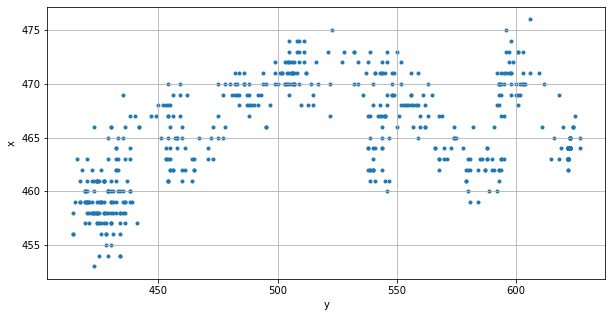

In [275]:
vec_trajectory = np.array(trajectory)
x = vec_trajectory[:,0]
y = vec_trajectory[:,1]
plt.figure(figsize=(10,5))
plt.scatter(y, x, marker=".")
plt.grid()
plt.xlabel('y')
plt.ylabel('x')
plt.show()

#### 1.4.j Plot Trajectory Line (Polynomial Regression)

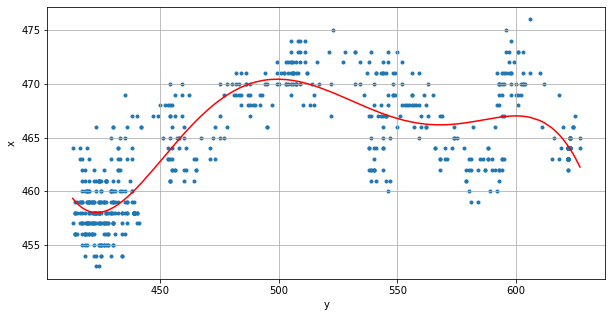

In [279]:
vec_trajectory = np.array(trajectory)
x = vec_trajectory[:,0]
y = vec_trajectory[:,1]
Y, X = np.unique(y), np.poly1d(np.polyfit(y, x, 5))(np.unique(y))

plt.figure(figsize=(10,5))
plt.scatter(y, x, marker=".")
plt.plot(Y, X, 'r-')
plt.grid()
plt.xlabel('y')
plt.ylabel('x')
plt.show()